In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
pd.read_excel('C:\\Users\\DeLL\\AI\\1688639662_ausapparalsales4thqrt2020.xlsx')
data = pd.read_excel('C:\\Users\\DeLL\\AI\\1688639662_ausapparalsales4thqrt2020.xlsx')
data.head()  
data.info()  
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7560 non-null   datetime64[ns]
 1   Time    7560 non-null   object        
 2   State   7560 non-null   object        
 3   Group   7560 non-null   object        
 4   Unit    7560 non-null   int64         
 5   Sales   7560 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 354.5+ KB


,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values before handling:")
print(missing_values)

# Handling missing values
mean_sales = data['Sales'].mean()
data['Sales'].fillna(mean_sales, inplace=True)

data.dropna(subset=['Unit'], inplace=True)  # Replace 'Column_Name' with the specific column

# Verify if missing values are handled
missing_values_after_handling = data.isnull().sum()
print("\nMissing values after handling:")
print(missing_values_after_handling)

# Select columns for normalization
columns_to_normalize = ['Sales', 'Unit'] 

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize selected columns
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# View normalized data
print(data.head())

Missing values before handling:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Missing values after handling:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64
        Date        Time State     Group      Unit     Sales
0 2020-10-01     Morning    WA      Kids  0.095238  0.095238
1 2020-10-01     Morning    WA       Men  0.095238  0.095238
2 2020-10-01     Morning    WA     Women  0.031746  0.031746
3 2020-10-01     Morning    WA   Seniors  0.206349  0.206349
4 2020-10-01   Afternoon    WA      Kids  0.015873  0.015873


In [5]:
# Group by State and calculate total sales per state
state_sales = data.groupby('State')['Sales'].sum()
print(state_sales)

# Group by Group and calculate total sales per group
group_sales = data.groupby('Group')['Sales'].sum()
print(group_sales)

data[['Sales', 'Unit']].describe()

State
 NSW    441.714286
 NT     109.079365
 QLD    177.888889
 SA     339.412698
 TAS    110.222222
 VIC    635.968254
 WA     106.365079
Name: Sales, dtype: float64
Group
 Kids       480.142857
 Men        484.444444
 Seniors    473.571429
 Women      482.492063
Name: Sales, dtype: float64


,Sales,Unit
count,7560.000000,7560.000000
mean,0.254054,0.254054
std,0.204784,0.204784
min,0.000000,0.000000
25%,0.095238,0.095238
50%,0.190476,0.190476
75%,0.380952,0.380952
max,1.000000,1.000000


In [6]:
# Generate weekly, monthly, and quarterly reports
weekly_report = data.resample('W', on='Date')['Sales'].sum()
monthly_report = data.resample('M', on='Date')['Sales'].sum()
quarterly_report = data.resample('Q', on='Date')['Sales'].sum()

print("\nWeekly Report:")
print(weekly_report)

print("\nMonthly Report:")
print(monthly_report)

print("\nQuarterly Report:")
print(quarterly_report)


Weekly Report:
Date
2020-10-04     84.857143
2020-10-11    152.777778
2020-10-18    150.476190
2020-10-25    151.587302
2020-11-01    122.460317
2020-11-08    113.809524
2020-11-15    115.761905
2020-11-22    115.380952
2020-11-29    117.698413
2020-12-06    169.412698
2020-12-13    181.492063
2020-12-20    182.317460
2020-12-27    183.047619
2021-01-03     79.571429
Freq: W-SUN, Name: Sales, dtype: float64

Monthly Report:
Date
2020-10-31    645.650794
2020-11-30    495.761905
2020-12-31    779.238095
Freq: M, Name: Sales, dtype: float64

Quarterly Report:
Date
2020-12-31    1920.650794
Freq: Q-DEC, Name: Sales, dtype: float64


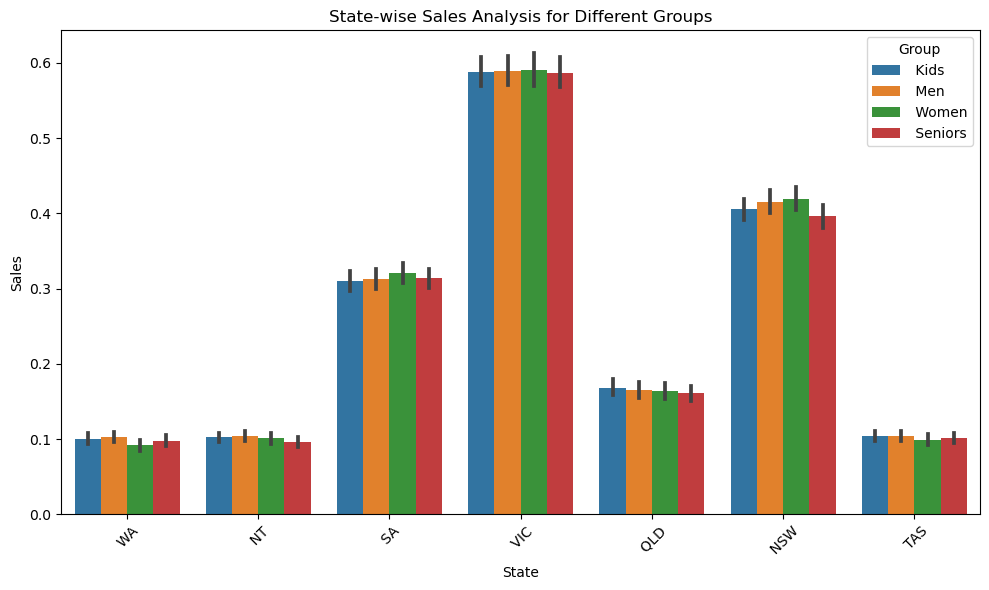

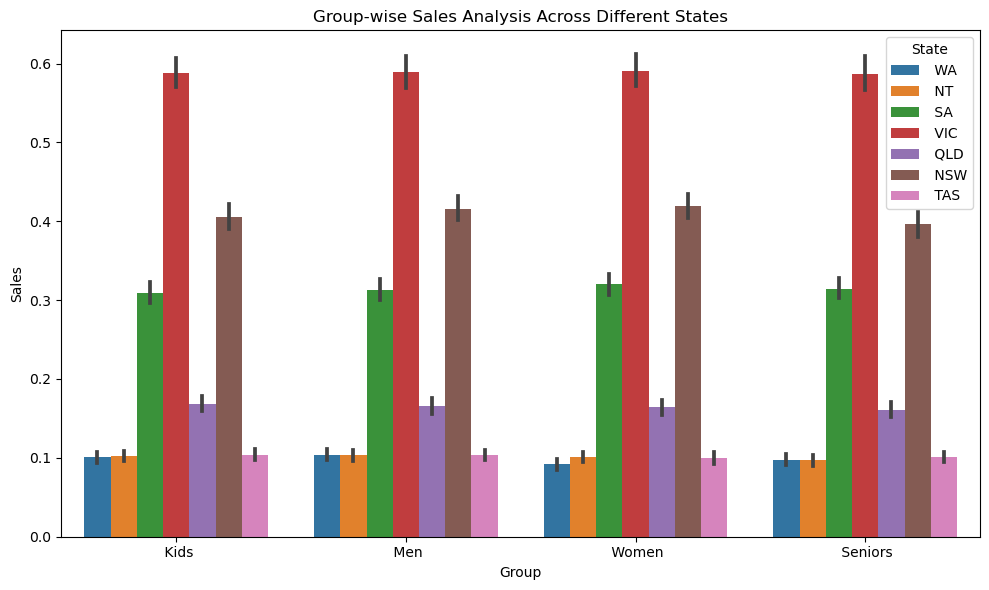

Time of the day with the highest sales:  Morning
Time of the day with the lowest sales:  Evening


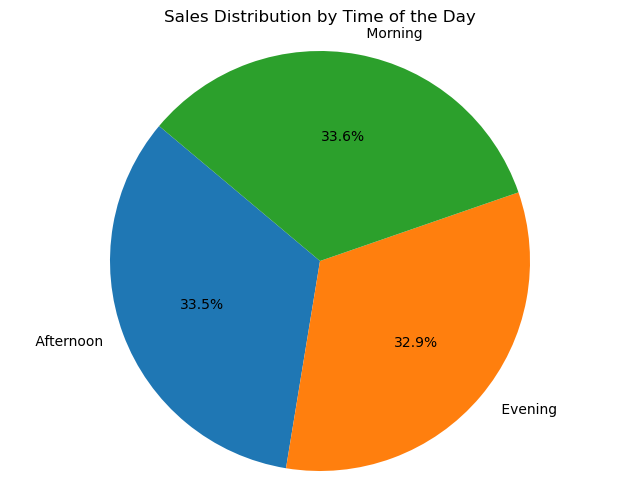

In [9]:
# State-wise sales analysis for different groups
plt.figure(figsize=(10, 6))
sns.barplot(x='State', y='Sales', hue='Group', data=data)
plt.xlabel('State')
plt.ylabel('Sales')
plt.title('State-wise Sales Analysis for Different Groups')
plt.legend(title='Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Group-wise sales analysis across different states
plt.figure(figsize=(10, 6))
sns.barplot(x='Group', y='Sales', hue='State', data=data)
plt.xlabel('Group')
plt.ylabel('Sales')
plt.title('Group-wise Sales Analysis Across Different States')
plt.legend(title='State')
plt.tight_layout()
plt.show()

#Grouping data by time and calculating total sales
time_sales = data.groupby('Time')['Sales'].sum()

# Find the time of the day with the highest and lowest sales
time_highest_sales = time_sales.idxmax()
time_lowest_sales = time_sales.idxmin()
print(f"Time of the day with the highest sales: {time_highest_sales}")
print(f"Time of the day with the lowest sales: {time_lowest_sales}")

# Plotting time-of-the-day analysis
plt.figure(figsize=(8, 6))
plt.pie(time_sales, labels=time_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Time of the Day')
plt.axis('equal')  
plt.show()